In [1]:
import numpy as np
import os
import pylab as plt
import cv2
import tensorflow as tf
import random
from tqdm import tqdm

In [2]:
DATADIR = '/home/sherry/Code/Datasets/PetImages/'
CATEGORIES = ["Dog", "Cat"]

In [3]:
training_data = []
IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

 61%|██████    | 7599/12501 [00:05<00:03, 1388.10it/s]Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
100%|██████████| 12501/12501 [00:08<00:00, 1493.12it/s]


In [4]:
print(len(training_data))

24946


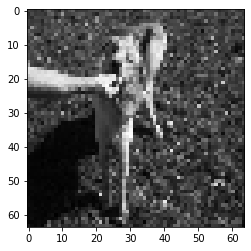

In [5]:
plt.imshow(training_data[random.randrange(24946)][0], cmap="gray")
plt.show()

In [6]:
print(len(training_data))

random.shuffle(training_data)

24946


In [7]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1)

In [8]:
import pickle

pickle.dump(X, open("X.pickle", "wb"))
pickle.dump(y, open("y.pickle", "wb"))